# Tutorial

This tutorial will get you through the basics of running the software and get you to binning your hextof data in no time!

### Step 1: setup the software

The following commands will compile the cython scripts and generate the settings file.
It is recommended that the SETTINGS.ini file be updated after running this tutorial.
The directories should be changed to the appropriate values.

In [1]:
%%bash
cd ..
python3 setup.py build_ext --inplace
yes | python3 InitializeSettings.py

running build_ext
 -> No Settings found. Initializing new Settings file.
 -> New setting file generated.


/!\  Please make sure you are using python3, as some of the libraries are not python2 compatible

/!\  The repo does not include a copy of the PAH library. A good idea would be to install it, then change the SETTINGS.ini file accordingly. By running the following command, the SETTINGS.ini file should be already be confired correctly


In [2]:
%%bash
cd ../..
git clone https://stash.desy.de/scm/cs/pah.git

Process is interrupted.


### Step 2: main imports

Most of these imports are either necessary or very important for the online analysis
It is recommended that missing libs be installed with pip3

In [3]:
# Imports needed for the user machine at FLASH (as we needed to install code locally as a user)
import sys, os
from datetime import datetime

repo = os.path.dirname(os.getcwd())
sys.path.append(repo)

import math
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
import processor.DldFlashDataframeCreator as DldFlashProcessor
import processor.utils as utils

The following libraries were written by Patrick Xian and they have been very useful for visualizing data on the beamline in the past. They are necessary for some parts of the tutorial (that do not exist yet)

In [4]:
%%bash
pip3 install git+https://github.com/RealPolitiX/mpes.git
pip3 install git+https://github.com/RealPolitiX/animo.git

Process is terminated.


In [5]:
# Patrick's libs:
import animo as a
from mpes import visualization as vis

### Step 3: loading data

The tutorial folder contains some sample data that can be loaded and sliced (binned)

In [6]:
runNumber = 22097

print(format(datetime.now()))

processor = DldFlashProcessor.DldFlashProcessor()
processor.runNumber=runNumber
processor.readData()
processor.storeDataframes()

2018-07-22 20:47:29.285247
Reading DAQ data from run 22097... Please wait...
Run 22097 contains 7,064 Macrobunches, from 99,007,477 to 99,014,541
Number of electrons: 6,952,657; 984 e/Mb 
Creating dataframes... Please wait...
[########################################] | 100% Completed |  5.6s
Electron dataframe created.
Microbunch dataframe created.


after running this code, the data has been loaded, the dataframes have been created, and they have been saved to disk in parquet format for easy loading in RAM.

### Step 4: slicing

The following cells defines all the necessary parameters for binning in the following cells

In [7]:
runNumber = 22097

# Time of flight parameters
ToFfrom = 650
ToFto = 700
ToFstep = processor.TOF_STEP_TO_NS*10

# delay parameters
delayFrom=-517
delayTo=-512.5
delayStep=0.05

# detector position parameters
dldFrom=0
dldTo=3000
dldStep=30

The following cell actually performs the binning after loading the pre-processed dataframes

In [8]:
processor = DldFlashProcessor.DldFlashProcessor()
processor.runNumber = runNumber
processor.readDataframes()
processor.postProcess()

processor.resetBins()
ToF = processor.addBinning('dldTime', ToFfrom,ToFto,ToFstep)

result = processor.computeBinnedData()

100%|██████████| 3/3 [00:05<00:00,  1.86s/it]


And here are the results!

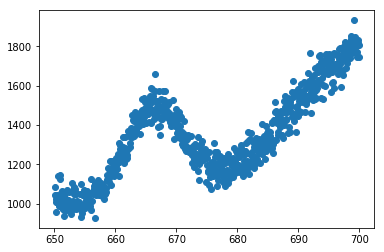

In [9]:
pl.plot(ToF,result,'o')